In [1]:
import os
import sys
sys.path.append('/nfs/z1/userhome/ChenXiaYu/workingdir/code/MagicBox')
import numpy as np

from os.path import join as pjoin
from scipy.io import loadmat
from scipy.stats.stats import pearsonr
from matplotlib import pyplot as plt
from magicbox.algorithm.plot import plot_polyfit
from cxy_visual_dev.lib.predefine import proj_dir

anal_dir = pjoin(proj_dir, 'analysis')
data_dir = pjoin(anal_dir, 'paper_fig')
work_dir = pjoin(anal_dir, 'plot/paper_fig')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

---PC1_smoothness_R---
polynomial:
  
0.4254 x + 11.36

score: (0.430675809393735, 0.0)
pearsonr (0.43067580939373507, 0.0)


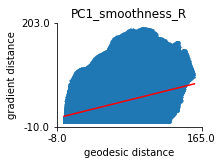

In [7]:
Hemi = 'R'  # L or R
gradient_name = 'PC1'  # PC1 or PC2
vis_name = f'MMP-vis3-{Hemi}'
figsize = (3.2, 2.4)
gradient_dist_file = pjoin(data_dir, f'gradient_distance_{Hemi}.mat')
geodesic_dist_file = pjoin(data_dir, f'geodesic_distance_{Hemi}.mat')
out_name = f'{gradient_name}_smoothness_{Hemi}'
out_file = pjoin(work_dir, f'{out_name}.jpg')
# out_file = 'show'

gradient_dist = loadmat(gradient_dist_file)
geodesic_dist = loadmat(geodesic_dist_file)

x = geodesic_dist['data'][0]
y = gradient_dist[gradient_name][0]
fig, ax = plt.subplots(1, 1, figsize=figsize)
print(f'---{out_name}---')
plot_polyfit(x, y, 1, color='r', s=1, ax=ax)
print('pearsonr', pearsonr(x, y))
xlim = ax.get_xlim()
xlim = (np.floor(xlim[0]), np.ceil(xlim[1]))
ax.set_xticks(xlim)
ax.set_xticklabels(xlim)
ylim = ax.get_ylim()
ylim = (np.floor(ylim[0]), np.ceil(ylim[1]))
ax.set_yticks(ylim)
ax.set_yticklabels(ylim)
ax.set_xlabel('geodesic distance')
ax.set_ylabel('gradient distance')
ax.set_title(out_name)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)